In [67]:
import numpy as np
import matplotlib.pyplot as plt     #importing e v e r y t h i n g
import seaborn as sns
sns.set(color_codes=True)
import scipy.stats as st
import scipy.special as sp
import csv
import math
import pandas as pd
import sklearn.metrics as met
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from copy import deepcopy
import re

In [68]:
# i tried reading the csv in a bad way

In [69]:
df = pd.read_csv('../data/blogtext.csv')  #read it in a good way
df.head()

id gender  age              topic      sign          date  \
0  2059027   male   15            Student       Leo   14,May,2004   
1  2059027   male   15            Student       Leo   13,May,2004   
2  2059027   male   15            Student       Leo   12,May,2004   
3  2059027   male   15            Student       Leo   12,May,2004   
4  3581210   male   33  InvestmentBanking  Aquarius  11,June,2004   

                                                text  
0             Info has been found (+/- 100 pages,...  
1             These are the team members:   Drewe...  
2             In het kader van kernfusie op aarde...  
3                   testing!!!  testing!!!            
4               Thanks to Yahoo!'s Toolbar I can ...

In [70]:
df.date = pd.to_datetime(df.date , infer_datetime_format = True, errors = 'coerce')  #change the dates a bit
                                                                                            #even though we dont use them

In [71]:
df.dtypes

id                 int64
gender            object
age                int64
topic             object
sign              object
date      datetime64[ns]
text              object
dtype: object

In [72]:
df.describe(include = 'O').transpose()

count  unique                  top    freq
gender  681284       2                 male  345193
topic   681284      40               indUnk  251015
sign    681284      12               Cancer   65048
text    681284  611652           urlLink        445

In [73]:
df.describe(exclude = 'O').transpose()

<ipython-input-73-06429e832fe1>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(exclude = 'O').transpose()


count unique        top   freq      first       last        mean  \
id    681284    NaN        NaT    NaN        NaT        NaT  2.3978e+06   
age   681284    NaN        NaT    NaN        NaT        NaT     23.9323   
date  673538   1736 2004-08-02  16546 1999-01-01 2006-08-23         NaN   

              std   min          25%          50%          75%          max  
id    1.24772e+06  5114  1.23961e+06  2.60758e+06  3.52566e+06  4.33765e+06  
age       7.78601    13           17           24           26           48  
date          NaN   NaN          NaN          NaN          NaN          NaN

Text(0, 0.5, 'Age of Poster')

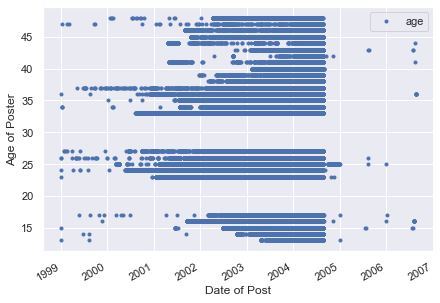

In [79]:
graph = df.plot(x = 'date', y ='age', style = '.', figsize=(7,5) ) #plot of every post with its date and the poster's age
graph.set_xlabel("Date of Post")
graph.set_ylabel("Age of Poster")

In [80]:
df.shape

(681284, 7)

In [81]:
df.columns

Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')

In [82]:
dg = df[['gender','age','date']]

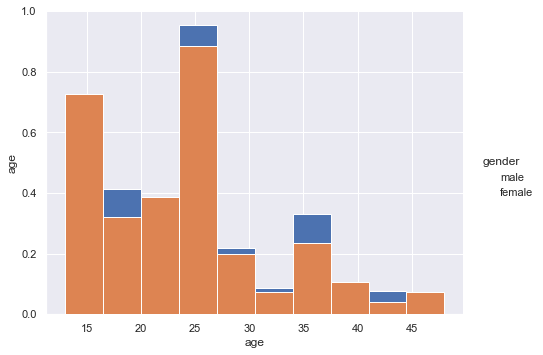

In [83]:

g = sns.PairGrid(dg, hue="gender",height=5,aspect=12/9)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)   #interesting little graph
g = g.add_legend()

In [84]:
dz = df[['sign']]

In [85]:
type(dz)

pandas.core.frame.DataFrame

In [86]:
dz.value_counts()

sign       
Cancer         65048
Aries          64979
Taurus         62561
Libra          62363
Virgo          60399
Scorpio        57161
Pisces         54053
Leo            53811
Gemini         51985
Sagittarius    50036
Aquarius       49687
Capricorn      49201
dtype: int64

In [87]:
dz.value_counts(normalize=True)   #look at the ratios of the posters

sign       
Cancer         0.095479
Aries          0.095377
Taurus         0.091828
Libra          0.091537
Virgo          0.088655
Scorpio        0.083902
Pisces         0.079340
Leo            0.078985
Gemini         0.076304
Sagittarius    0.073444
Aquarius       0.072931
Capricorn      0.072218
dtype: float64

<AxesSubplot:>

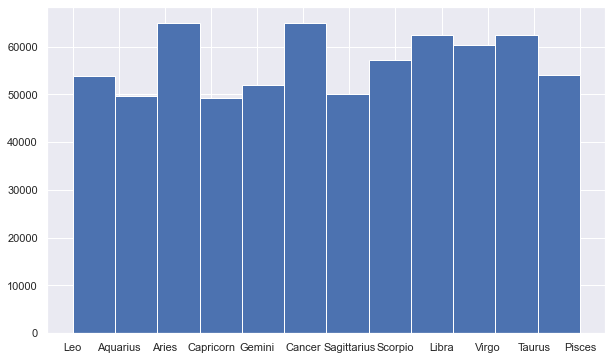

In [91]:
df['sign'].hist(bins=12,figsize=(10,6))

In [22]:
#cleaning up the data
df.drop(['id','gender','age','topic','date'], axis=1, inplace=True)

In [23]:
df.head(10)

sign                                               text
0       Leo             Info has been found (+/- 100 pages,...
1       Leo             These are the team members:   Drewe...
2       Leo             In het kader van kernfusie op aarde...
3       Leo                   testing!!!  testing!!!          
4  Aquarius               Thanks to Yahoo!'s Toolbar I can ...
5  Aquarius               I had an interesting conversation...
6  Aquarius               Somehow Coca-Cola has a way of su...
7  Aquarius               If anything, Korea is a country o...
8  Aquarius               Take a read of this news article ...
9  Aquarius               I surf the English news sites a l...

In [24]:
df['clean_text']=df['text'].apply(lambda x: re.sub(r'[^A-Za-z]+',' ',x))  #take out unwanted characters

In [25]:
df['clean_text']=df['clean_text'].apply(lambda x: x.lower())  #lowercase everything

In [26]:
df['clean_text']=df['clean_text'].apply(lambda x: x.strip())  #remove extra spaces

In [43]:
word_counts = dict()     #count up every word and what sign it came from

count = 0
NUM_POSTS = 200000

ddf = df.head(NUM_POSTS)

for post in ddf['clean_text']:
    for word in post.split():
        cur = ddf['sign'][count] + '-' + word
        if cur in word_counts:
            word_counts[cur] += 1
        else:
            word_counts[cur] = 1
    count += 1

In [28]:
word_counts

{'Leo-info': 150,
 'Leo-has': 6599,
 'Leo-been': 6454,
 'Leo-found': 1546,
 'Leo-pages': 197,
 'Leo-and': 85720,
 'Leo-mb': 36,
 'Leo-of': 60407,
 'Leo-pdf': 20,
 'Leo-files': 110,
 'Leo-now': 9043,
 'Leo-i': 135363,
 'Leo-have': 21860,
 'Leo-to': 96036,
 'Leo-wait': 1046,
 'Leo-untill': 38,
 'Leo-our': 5285,
 'Leo-team': 647,
 'Leo-leader': 148,
 'Leo-processed': 24,
 'Leo-it': 50100,
 'Leo-learns': 10,
 'Leo-html': 160,
 'Leo-these': 2898,
 'Leo-are': 13851,
 'Leo-the': 129674,
 'Leo-members': 258,
 'Leo-drewes': 1,
 'Leo-van': 193,
 'Leo-der': 30,
 'Leo-laag': 1,
 'Leo-urllink': 11232,
 'Leo-mail': 474,
 'Leo-ruiyu': 1,
 'Leo-xie': 4,
 'Leo-bryan': 35,
 'Leo-aaldering': 1,
 'Leo-me': 22642,
 'Leo-in': 42798,
 'Leo-het': 68,
 'Leo-kader': 4,
 'Leo-kernfusie': 1,
 'Leo-op': 66,
 'Leo-aarde': 2,
 'Leo-maak': 1,
 'Leo-je': 72,
 'Leo-eigen': 4,
 'Leo-waterstofbom': 1,
 'Leo-how': 6837,
 'Leo-build': 205,
 'Leo-an': 7657,
 'Leo-h': 1084,
 'Leo-bomb': 178,
 'Leo-from': 10716,
 'Leo-ascott'

In [29]:
vocab = dict() #get the vocabulary over the same corpus

for post in ddf['clean_text']:
    for word in post.split():
        if not word in vocab:
            vocab[word] = 1
            
vocab = vocab.keys()

In [30]:
vocab

dict_keys(['info', 'has', 'been', 'found', 'pages', 'and', 'mb', 'of', 'pdf', 'files', 'now', 'i', 'have', 'to', 'wait', 'untill', 'our', 'team', 'leader', 'processed', 'it', 'learns', 'html', 'these', 'are', 'the', 'members', 'drewes', 'van', 'der', 'laag', 'urllink', 'mail', 'ruiyu', 'xie', 'bryan', 'aaldering', 'me', 'in', 'het', 'kader', 'kernfusie', 'op', 'aarde', 'maak', 'je', 'eigen', 'waterstofbom', 'how', 'build', 'an', 'h', 'bomb', 'from', 'ascott', 'tartarus', 'uwa', 'edu', 'au', 'andrew', 'scott', 'newsgroups', 'rec', 'humor', 'subject', 'humorous', 'date', 'feb', 'gmt', 'organization', 'university', 'western', 'australia', 'original', 'file', 'dated', 'th', 'november', 'seemed', 'be', 'a', 'transcript', 'seven', 'days', 'article', 'poorly', 'formatted', 'corrupted', 'added', 'text', 'between', 'examine', 'under', 'microscope', 'malleable', 'like', 'gold', 'as', 'was', 'missing', 'if', 'anyone', 'full', 'please', 'distribute', 'am', 'not', 'responsible', 'for', 'accuracy', 

In [31]:
zods = ['Leo','Aquarius','Aries','Capricorn','Gemini','Cancer','Sagittarius','Scorpio','Libra','Virgo','Taurus','Pisces']
word_ratios = dict()
                        #normalize the words over their total usage, and remove ones that are too infrequent
for word in vocab:
    sum = 0
    for sign in zods:
        if (sign + '-' + word) in word_counts:
            sum += word_counts[sign + '-' + word]
    if sum >= 3000:
        for sign in zods:
            if (sign + '-' + word) in word_counts:
                word_ratios[sign + '-' + word] = word_counts[sign + '-' + word] / sum
            else:
                word_ratios[sign + '-' + word] = 0
    else:
        for sign in zods:
            word_ratios[sign + '-' + word] = 0
    

In [32]:
word_ratios['Aquarius-if']

0.09203920631125986

In [33]:
word_ratios

{'Leo-info': 0,
 'Aquarius-info': 0,
 'Aries-info': 0,
 'Capricorn-info': 0,
 'Gemini-info': 0,
 'Cancer-info': 0,
 'Sagittarius-info': 0,
 'Scorpio-info': 0,
 'Libra-info': 0,
 'Virgo-info': 0,
 'Taurus-info': 0,
 'Pisces-info': 0,
 'Leo-has': 0.08836841823343511,
 'Aquarius-has': 0.09530505115431999,
 'Aries-has': 0.08685521452675558,
 'Capricorn-has': 0.07395950506186727,
 'Gemini-has': 0.07619583266377417,
 'Cancer-has': 0.10269698430553324,
 'Sagittarius-has': 0.06797364615137394,
 'Scorpio-has': 0.07517810273715786,
 'Libra-has': 0.07796346885210777,
 'Virgo-has': 0.08791311800310675,
 'Taurus-has': 0.09155551984573357,
 'Pisces-has': 0.07603513846483476,
 'Leo-been': 0.08453065447734803,
 'Aquarius-been': 0.0902935128551034,
 'Aries-been': 0.08674411599062226,
 'Capricorn-been': 0.07160351534361042,
 'Gemini-been': 0.0784796531807049,
 'Cancer-been': 0.10278843761050936,
 'Sagittarius-been': 0.06768739112781758,
 'Scorpio-been': 0.07655433458631845,
 'Libra-been': 0.084412777828

In [34]:
sorted_ratios = sorted(word_ratios.items(), key=lambda x: x[1], reverse=True)  #sort by the most 'informative'

In [36]:
sorted_ratios

[('Taurus-jumper', 0.9847027972027972),
 ('Cancer-que', 0.48346303501945526),
 ('Aquarius-law', 0.40552046141170006),
 ('Aquarius-students', 0.3474985512845277),
 ('Aquarius-tt', 0.34368932038834954),
 ('Aquarius-education', 0.31433333333333335),
 ('Leo-ko', 0.3094425483503982),
 ('Leo-photo', 0.29574260643483913),
 ('Leo-sa', 0.28443546058330926),
 ('Leo-na', 0.266068149357274),
 ('Aquarius-library', 0.2657780195865071),
 ('Aquarius-information', 0.2605968124788064),
 ('Leo-h', 0.25902031063321385),
 ('Aquarius-student', 0.25755909840571745),
 ('Leo-camera', 0.25572305974316023),
 ('Leo-comments', 0.2538015362909547),
 ('Libra-pm', 0.2487947146003214),
 ('Cancer-y', 0.239106901217862),
 ('Aquarius-research', 0.23533064265755976),
 ('Taurus-x', 0.2339846062759029),
 ('Aquarius-learning', 0.2308411214953271),
 ('Virgo-cos', 0.2201114488348531),
 ('Taurus-ko', 0.2161547212741752),
 ('Taurus-sa', 0.20386947733179325),
 ('Virgo-yea', 0.2018539976825029),
 ('Pisces-smart', 0.192506459948320

In [38]:
print(sorted_ratios[3][0])
print(sorted_ratios[6][0].split('-')[1])

Aquarius-students
ko


In [62]:
WORD_LIMIT = 120

tally_words = dict()
                        #get the most informative words to be tallied
count = 0

while count < WORD_LIMIT:
    tally_words[sorted_ratios[count][0].split('-')[1]] = 0
    count += 1
    
tally_words

{'jumper': 0,
 'que': 0,
 'law': 0,
 'students': 0,
 'tt': 0,
 'education': 0,
 'ko': 0,
 'photo': 0,
 'sa': 0,
 'na': 0,
 'library': 0,
 'information': 0,
 'h': 0,
 'student': 0,
 'camera': 0,
 'comments': 0,
 'pm': 0,
 'y': 0,
 'research': 0,
 'x': 0,
 'learning': 0,
 'cos': 0,
 'yea': 0,
 'smart': 0,
 'de': 0,
 'fucking': 0,
 'shot': 0,
 'l': 0,
 'president': 0,
 'ur': 0,
 'united': 0,
 'http': 0,
 'j': 0,
 'article': 0,
 'email': 0,
 'offer': 0,
 'michael': 0,
 'study': 0,
 'classes': 0,
 'click': 0,
 'states': 0,
 'la': 0,
 'fuck': 0,
 'da': 0,
 'shopping': 0,
 'matt': 0,
 'public': 0,
 'mike': 0,
 'www': 0,
 'national': 0,
 'iraq': 0,
 'community': 0,
 'lord': 0,
 'title': 0,
 'st': 0,
 'v': 0,
 'den': 0,
 'chris': 0,
 'evil': 0,
 'practice': 0,
 'blah': 0,
 'search': 0,
 'link': 0,
 'interest': 0,
 'season': 0,
 'player': 0,
 'process': 0,
 'camp': 0,
 'paul': 0,
 'brain': 0,
 'okay': 0,
 'currently': 0,
 'war': 0,
 'birthday': 0,
 'didnt': 0,
 'issues': 0,
 'class': 0,
 'hehe':

In [63]:
test = []

test.append([1,2])
print(test)
test.append([3,4,5])
print(test)

[[1, 2]]
[[1, 2], [3, 4, 5]]


In [64]:
tallies = [[] for i in range(NUM_POSTS)]
count = 0
                    #give a tally of every 'important' word on a per post basis
for post in ddf['clean_text']:
    for word in post.split():
        if cur in tally_words:
            tally_words[cur] += 1
    tallies[count] = list(tally_words.values())
    count += 1
    for key in tally_words.keys():
        tally_words[key] = 0

In [65]:
tallies

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])